In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r'E:\BITS\Yr 3 Sem 2\BITS F464 Machine Learning\Assignments\Assignment 2\2C\dataset_comb.csv')

In [5]:
df.drop(['id'],axis=1,inplace=True)

In [6]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [7]:
X=df.iloc[:,:10]
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


In [8]:
y=df.iloc[:,10:]
y.head()

,Class
0,jasmine
1,jasmine
2,jasmine
3,jasmine
4,jasmine


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [10]:
models=[GaussianNB(),SVC(),LinearDiscriminantAnalysis(),Perceptron(),LogisticRegression(max_iter=1000),MLPClassifier(max_iter=1000)]
modelName=["GaussianNB","SVC","LinearDiscriminantAnalysis","Perceptron","LogisticRegression","MLPClassifier"]

In [12]:
from sklearn.model_selection import cross_val_score
scores=[]
for i,model in enumerate(models):
    score=cross_val_score(model,X,y.values.ravel(),cv=7)
    score=[round(acc, 3) for acc in score]
    scores.append(score)
    print(f"{modelName[i]}: {score} Average:{round(np.average(score),3)}")
    print()

GaussianNB: [0.983, 0.989, 0.993, 0.99, 0.987, 0.982, 0.913] Average:0.977

SVC: [0.863, 0.934, 0.945, 0.949, 0.946, 0.952, 0.891] Average:0.926

LinearDiscriminantAnalysis: [0.86, 0.999, 1.0, 0.998, 0.998, 0.994, 0.907] Average:0.965

Perceptron: [0.824, 0.975, 0.992, 0.987, 0.985, 0.795, 0.902] Average:0.923

LogisticRegression: [0.678, 0.997, 1.0, 1.0, 0.999, 0.997, 0.934] Average:0.944

MLPClassifier: [0.983, 0.982, 0.994, 0.996, 0.986, 0.997, 0.953] Average:0.984



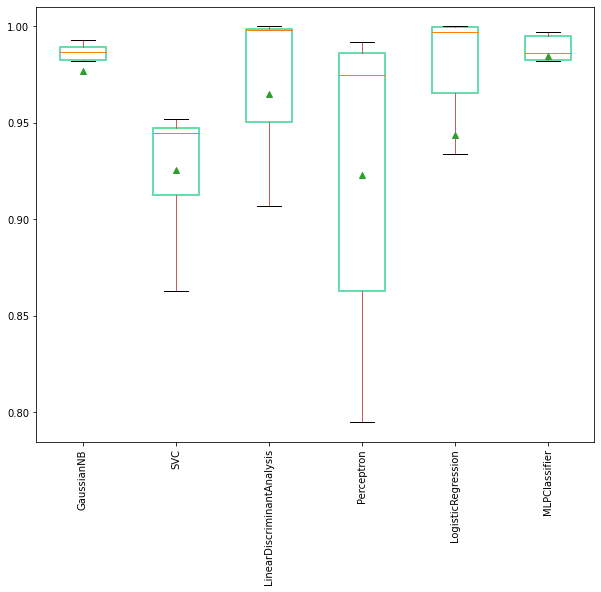

In [13]:
plt.figure(figsize=(10,8))
bp = plt.boxplot(scores, sym='', widths=0.5,showmeans=True)
plt.setp(bp['boxes'], color='#66ddaa',linewidth=2)
plt.setp(bp['whiskers'], color='indianred')
plt.setp(bp['caps'], color='black')
plt.setp(bp['means'], color='#654321')
plt.xticks(range(1,len(modelName)+1), modelName, rotation ='vertical')
plt.savefig("plot.png",dpi=1500)
plt.show()

In [14]:
maxx=-1
for i in scores:
    if maxx<=max(i):
        maxx=max(i)
print(max(scores[4]))

1.0
